<a href="https://colab.research.google.com/github/glaubermateus/Ciencia_De_Dados/blob/main/1-classificacao/2-estudante/ML_Classificacao_Usou_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação das Bibliotecas e Carregamento dos Dados

In [92]:
# Importacao Bibliotecas
from google.colab import files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importar modelos e metricas
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, roc_curve
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Definindo arquivo
uploaded = files.upload()

Saving ai_assistant_usage_student_life.csv to ai_assistant_usage_student_life.csv


In [ ]:
# Carregamento dos dados
df = pd.read_csv('/content/ai_assistant_usage_student_life.csv')

In [ ]:
# Primeiras Linhas
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [ ]:
# Dimensão
df.shape

(10000, 11)

## Limpeza e Transformação dos Dados

In [ ]:
# Renomear colunas
columns = ['id_sessao','nivel_estudantil','disciplina','data','duracao_com_ia_min','total_prompts','tipo_tarefa','nivel_assistencia_ia','objetivo','usou_novamente','taxa_satisfacao']
df.columns = columns
print(df.columns)

Index(['id_sessao', 'nivel_estudantil', 'disciplina', 'data',
       'duracao_com_ia_min', 'total_prompts', 'tipo_tarefa',
       'nivel_assistencia_ia', 'objetivo', 'usou_novamente',
       'taxa_satisfacao'],
      dtype='object')


In [ ]:
# Checando informacoes gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_sessao             10000 non-null  object 
 1   nivel_estudantil      10000 non-null  object 
 2   disciplina            10000 non-null  object 
 3   data                  10000 non-null  object 
 4   duracao_com_ia_min    10000 non-null  float64
 5   total_prompts         10000 non-null  int64  
 6   tipo_tarefa           10000 non-null  object 
 7   nivel_assistencia_ia  10000 non-null  int64  
 8   objetivo              10000 non-null  object 
 9   usou_novamente        10000 non-null  bool   
 10  taxa_satisfacao       10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


In [ ]:
# Checando duplicidade
df.duplicated().sum()

np.int64(0)

In [ ]:
# Checando dados ausentes
df.isna().sum()

,0
id_sessao,0
nivel_estudantil,0
disciplina,0
data,0
duracao_com_ia_min,0
total_prompts,0
tipo_tarefa,0
nivel_assistencia_ia,0
objetivo,0
usou_novamente,0


In [ ]:
# Visualizando os Valores Unicos das Variaveis Categoricas
espaco = '-' * 70
print('nivel_estudantil: ', df['nivel_estudantil'].unique())
print(espaco)
print('disciplina: ', df['disciplina'].unique())
print(espaco)
print('tipo_tarefa: ', df['tipo_tarefa'].unique())
print(espaco)
print('objetivo: ', df['objetivo'].unique())

nivel_estudantil:  ['Undergraduate' 'Graduate' 'High School']
----------------------------------------------------------------------
disciplina:  ['Computer Science' 'Psychology' 'Business' 'Biology' 'Math' 'History'
 'Engineering']
----------------------------------------------------------------------
tipo_tarefa:  ['Studying' 'Coding' 'Writing' 'Brainstorming' 'Homework Help' 'Research']
----------------------------------------------------------------------
objetivo:  ['Assignment Completed' 'Idea Drafted' 'Confused' 'Gave Up']


In [ ]:
# Reajustando o nome das categorias (traduzindo para pt-br)
df['nivel_estudantil'] = df['nivel_estudantil'].map({'Undergraduate': 'Graduando',
                                                     'Graduate':'Graduado',
                                                     'High School':'Ensino Medio'})
df['disciplina'] = df['disciplina'].map({'Computer Science':'Ciencias Computacao',
                                         'Psychology':'Psicologia',
                                         'Business':'Negocios',
                                         'Biology':'Biologia',
                                         'Math':'Matematica',
                                         'History':'Historia',
                                         'Engineering':'Engenharia'})
df['tipo_tarefa'] = df['tipo_tarefa'].map({'Studying':'Estudo',
                                           'Coding':'Codigo',
                                           'Writing':'Escrita',
                                           'Brainstorming':'Ideias',
                                           'Homework Help':'Tarefa de Casa',
                                           'Research':'Pesquisa'})
df['objetivo'] = df['objetivo'].map({'Assignment Completed':'Tarefa Concluida',
                                     'Idea Drafted':'Ideia Elaborada',
                                     'Confused':'Confuso',
                                     'Gave Up':'Desistiu'})

In [ ]:
# Visualizando os valores unicos por categoria
print(df['nivel_estudantil'].value_counts().sort_values(ascending = False))
print(espaco)
print(df['disciplina'].value_counts().sort_values(ascending = False))
print(espaco)
print(df['tipo_tarefa'].value_counts().sort_values(ascending = False))
print(espaco)
print(df['objetivo'].value_counts().sort_values(ascending = False))
print(espaco)

nivel_estudantil
Graduando       5978
Ensino Medio    2027
Graduado        1995
Name: count, dtype: int64
----------------------------------------------------------------------
disciplina
Biologia               1458
Ciencias Computacao    1445
Engenharia             1430
Matematica             1422
Psicologia             1418
Historia               1417
Negocios               1410
Name: count, dtype: int64
----------------------------------------------------------------------
tipo_tarefa
Escrita           3101
Estudo            2040
Tarefa de Casa    1959
Codigo            1948
Ideias             476
Pesquisa           476
Name: count, dtype: int64
----------------------------------------------------------------------
objetivo
Tarefa Concluida    4768
Ideia Elaborada     2866
Confuso             1613
Desistiu             753
Name: count, dtype: int64
----------------------------------------------------------------------


In [ ]:
# Alterar o tipo de dados da coluna data
df['data'] = pd.to_datetime(df['data'])
print(df['data'].dtype)

datetime64[ns]


In [ ]:
# Checando a coluna data
df['data'].head()

,data
0,2024-11-03
1,2024-08-25
2,2025-01-12
3,2025-05-06
4,2025-03-18


In [ ]:
# Checando ausencia de dados na coluna data
df['data'].isna().sum()

np.int64(0)

In [ ]:
# Data minima e Data maxima
print('Data minima: ', df['data'].dt.date.min())
print('Data maxima: ', df['data'].dt.date.max())

Data minima:  2024-06-24
Data maxima:  2025-06-24


In [ ]:
# Resumo estatistico
df.describe()

,data,duracao_com_ia_min,total_prompts,nivel_assistencia_ia,taxa_satisfacao
count,10000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2024-12-23 09:05:36.960000,19.846467,5.607500,3.479500,3.417780
min,2024-06-24 00:00:00,0.030000,1.000000,1.000000,1.000000
25%,2024-09-20 00:00:00,9.630000,2.000000,3.000000,2.600000
50%,2024-12-25 00:00:00,16.650000,4.000000,4.000000,3.500000
75%,2025-03-27 00:00:00,26.670000,8.000000,4.000000,4.400000
max,2025-06-24 00:00:00,110.810000,39.000000,5.000000,5.000000
std,NaN,13.897302,4.648764,0.991805,1.143331


In [ ]:
# Inserir a coluna 'duracao_com_ia_seg' e mover ela para ficar do lado de 'duracao_com_ia_min'
df['duracao_com_ia_seg'] = df['duracao_com_ia_min'] * 60
idx = df.columns.get_loc('duracao_com_ia_min') # obtem o indice
col = df.pop('duracao_com_ia_seg') # remove a coluna que foi pro final
df.insert(idx+1, column = 'duracao_com_ia_seg', value = col)
print(df.columns)
# Criando nova coluna
df['atendeu_a_expectativa'] = df['objetivo'].apply(lambda x: 1 if x in ('Tarefa Concluida', 'Ideia Elaborada') else 0)

Index(['id_sessao', 'nivel_estudantil', 'disciplina', 'data',
       'duracao_com_ia_min', 'duracao_com_ia_seg', 'total_prompts',
       'tipo_tarefa', 'nivel_assistencia_ia', 'objetivo', 'usou_novamente',
       'taxa_satisfacao'],
      dtype='object')


In [ ]:
# Validando a criação da nova coluna
pd.crosstab(df['objetivo'], df['atendeu_a_expectativa'])

atendeu_a_expectativa,0,1
objetivo,,
Confuso,1613,0
Desistiu,753,0
Ideia Elaborada,0,2866
Tarefa Concluida,0,4768


## Análise Exploratória dos Dados

In [ ]:
df.sample(10)

,id_sessao,nivel_estudantil,disciplina,data,duracao_com_ia_min,duracao_com_ia_seg,total_prompts,tipo_tarefa,nivel_assistencia_ia,objetivo,usou_novamente,taxa_satisfacao,atendeu_a_expectativa
5449,SESSION05450,Ensino Medio,Biologia,2025-03-22,47.59,2855.4,14,Escrita,4,Tarefa Concluida,True,4.0,1
7272,SESSION07273,Ensino Medio,Engenharia,2024-07-13,3.44,206.4,1,Escrita,3,Tarefa Concluida,True,2.4,1
8050,SESSION08051,Graduado,Engenharia,2025-06-08,16.48,988.8,4,Escrita,4,Tarefa Concluida,True,2.1,1
3864,SESSION03865,Ensino Medio,Negocios,2025-01-05,4.04,242.4,1,Estudo,3,Ideia Elaborada,True,1.4,1
4106,SESSION04107,Graduando,Historia,2025-01-09,23.57,1414.2,10,Tarefa de Casa,5,Confuso,False,5.0,0
5021,SESSION05022,Graduado,Psicologia,2025-03-31,20.10,1206.0,8,Tarefa de Casa,2,Ideia Elaborada,True,1.6,1
4420,SESSION04421,Ensino Medio,Negocios,2025-05-26,23.81,1428.6,8,Estudo,3,Confuso,False,1.8,0
3722,SESSION03723,Graduando,Historia,2024-09-05,23.96,1437.6,7,Estudo,3,Ideia Elaborada,True,3.0,1
3288,SESSION03289,Graduando,Negocios,2025-01-29,14.95,897.0,6,Estudo,4,Tarefa Concluida,False,3.5,1
2410,SESSION02411,Graduando,Engenharia,2024-08-06,11.02,661.2,2,Codigo,4,Tarefa Concluida,False,5.0,1


In [ ]:
# Tabela de contingencia: nivel estudantil vs disciplina
pd.crosstab(df['nivel_estudantil'], df['disciplina'], margins=True)

disciplina,Biologia,Ciencias Computacao,Engenharia,Historia,Matematica,Negocios,Psicologia,All
nivel_estudantil,,,,,,,,
Ensino Medio,301,288,301,296,275,284,282,2027
Graduado,290,291,266,283,275,262,328,1995
Graduando,867,866,863,838,872,864,808,5978
All,1458,1445,1430,1417,1422,1410,1418,10000


In [ ]:
# Tabela de contingencia: nivel estudantil vs objetivo
pd.crosstab(df['nivel_estudantil'], df['objetivo'], margins=True)

objetivo,Confuso,Desistiu,Ideia Elaborada,Tarefa Concluida,All
nivel_estudantil,,,,,
Ensino Medio,335,147,597,948,2027
Graduado,331,161,567,936,1995
Graduando,947,445,1702,2884,5978
All,1613,753,2866,4768,10000


In [ ]:
# Tabela de contingencia: nivel estudantil vs objetivo (%)
pd.crosstab(df['nivel_estudantil'], df['objetivo'], normalize=True)

objetivo,Confuso,Desistiu,Ideia Elaborada,Tarefa Concluida
nivel_estudantil,,,,
Ensino Medio,0.0335,0.0147,0.0597,0.0948
Graduado,0.0331,0.0161,0.0567,0.0936
Graduando,0.0947,0.0445,0.1702,0.2884


In [ ]:
# Media de total de prompts por nivel estudantil
df.groupby('nivel_estudantil')['total_prompts'].mean()

,total_prompts
nivel_estudantil,
Ensino Medio,5.619142
Graduado,5.787469
Graduando,5.543493


In [ ]:
# Media de segundos por nivel estudantil
df.groupby('nivel_estudantil')['duracao_com_ia_seg'].mean()

,duracao_com_ia_seg
nivel_estudantil,
Ensino Medio,1201.424371
Graduado,1215.134135
Graduando,1179.056608


In [ ]:
# Mais um insight
pd.crosstab(df['usou_novamente'], df['atendeu_a_expectativa'], margins= True)

atendeu_a_expectativa,0,1,All
usou_novamente,,,
False,1412,1524,2936
True,954,6110,7064
All,2366,7634,10000


In [ ]:
sns.color_palette()
#e, depois, acessando o atributo de lista de nomes das paletas (como em print(list(sns.color_palette())))

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

## Visualização de Dados

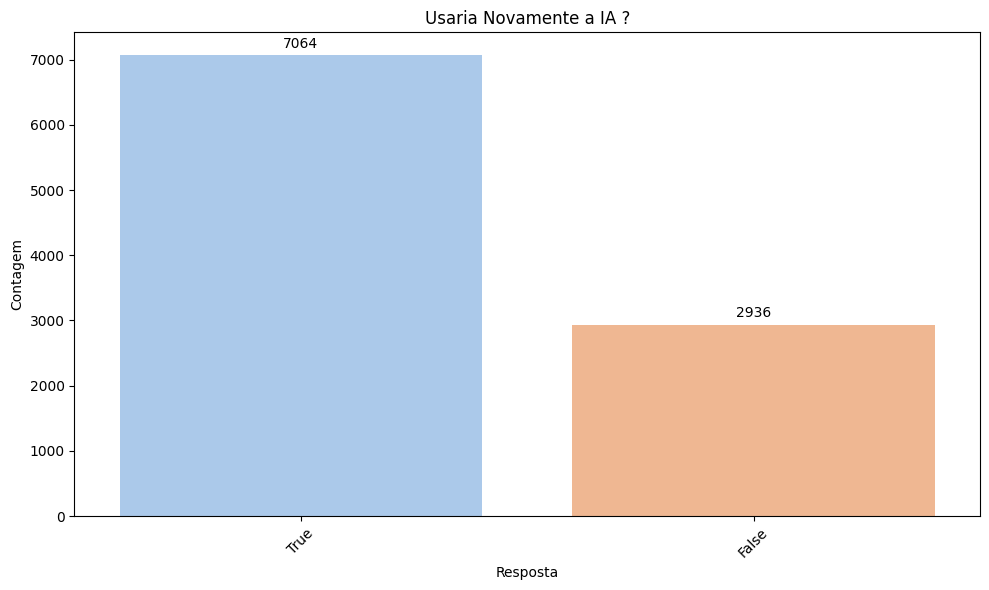

In [ ]:
# Variavel target
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='usou_novamente', order=df['usou_novamente'].value_counts().index, palette='pastel')

for container in ax.containers:
    ax.bar_label(container, label_type = 'edge', padding = 3)

plt.xlabel('Resposta')
plt.ylabel('Contagem')
plt.title('Usaria Novamente a IA ?')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

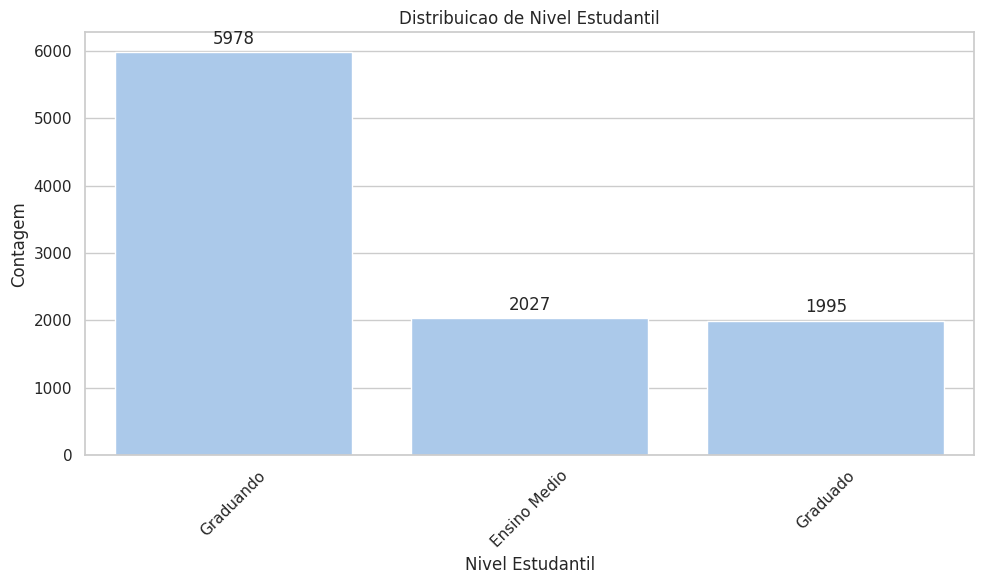

In [ ]:
# Quantidade de estudantes por escolaridade
sns.set(style = 'whitegrid',palette='pastel')
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='nivel_estudantil', order=df['nivel_estudantil'].value_counts().index)

for container in ax.containers:
    ax.bar_label(container, label_type = 'edge', padding = 3)

plt.xlabel('Nivel Estudantil')
plt.ylabel('Contagem')
plt.title('Distribuicao de Nivel Estudantil')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

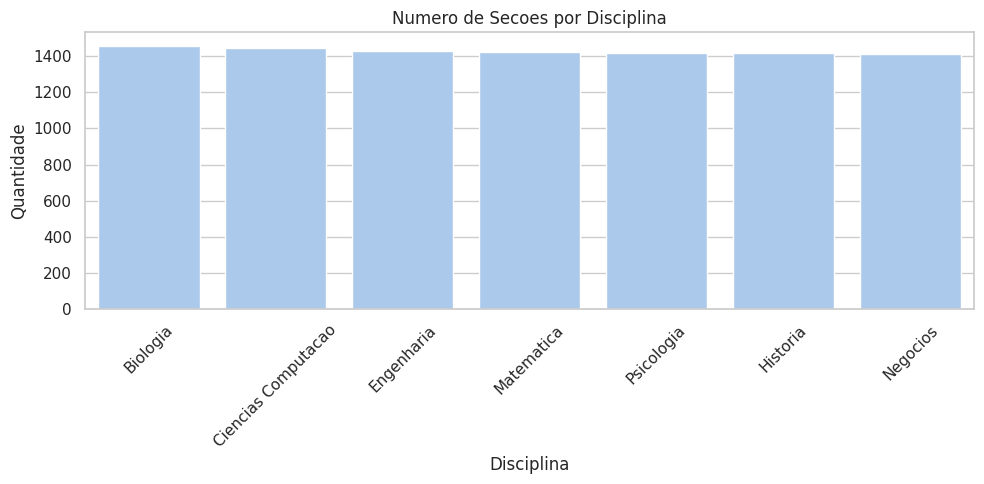

In [ ]:
# Secoes por Disciplina
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='disciplina', order=df['disciplina'].value_counts().index)
plt.title('Numero de Secoes por Disciplina')
plt.xlabel('Disciplina')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

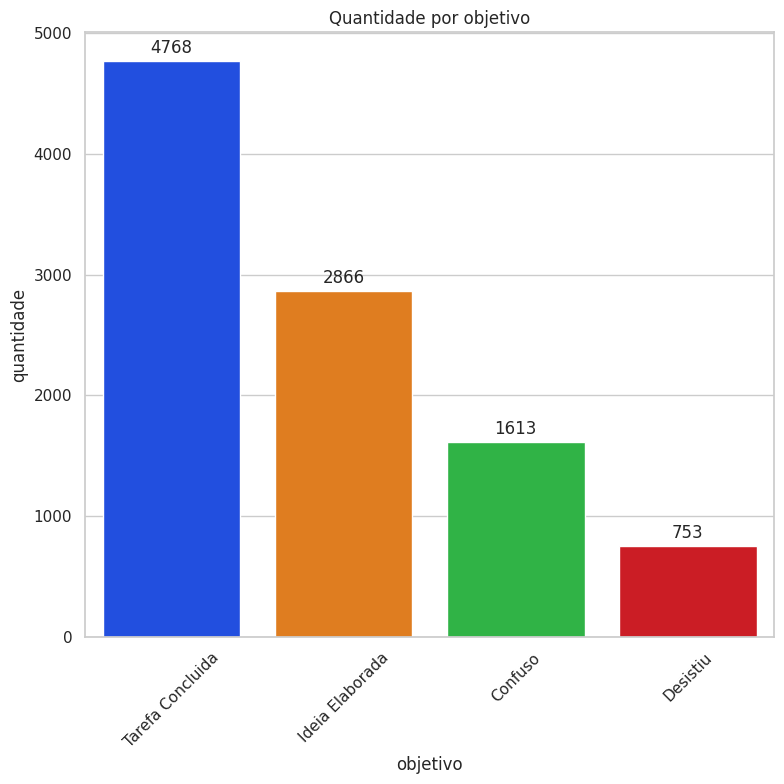

In [ ]:
# Quantidade por objetivo
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='objetivo', data=df, palette='bright')
for container in ax.containers:
    ax.bar_label(container, label_type = 'edge', padding = 3)
plt.title('Quantidade por objetivo')
plt.xlabel('objetivo')
plt.ylabel('quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

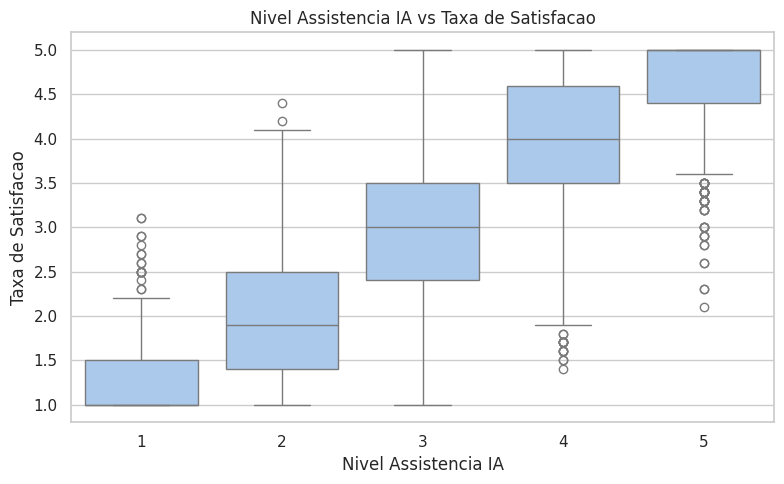

In [ ]:
# Nivel Assistencia IA vs Taxa de Satisfacao
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='nivel_assistencia_ia', y='taxa_satisfacao')
plt.title('Nivel Assistencia IA vs Taxa de Satisfacao')
plt.xlabel('Nivel Assistencia IA')
plt.ylabel('Taxa de Satisfacao')
plt.tight_layout()
plt.show()

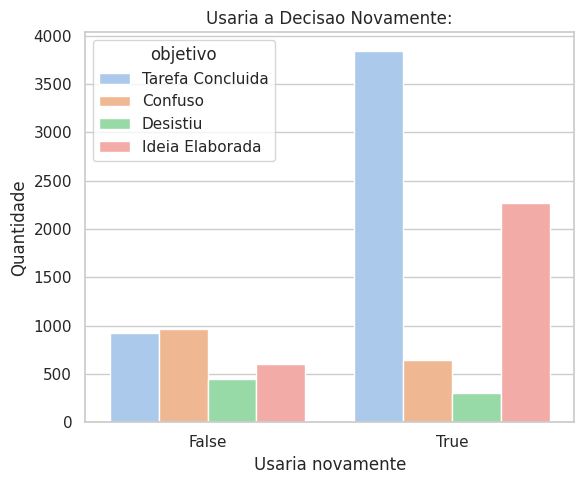

In [ ]:
# Usaria a Decisao Novamente
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='usou_novamente', hue='objetivo')
plt.title('Usaria a Decisao Novamente:')
plt.xlabel('Usaria novamente')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()

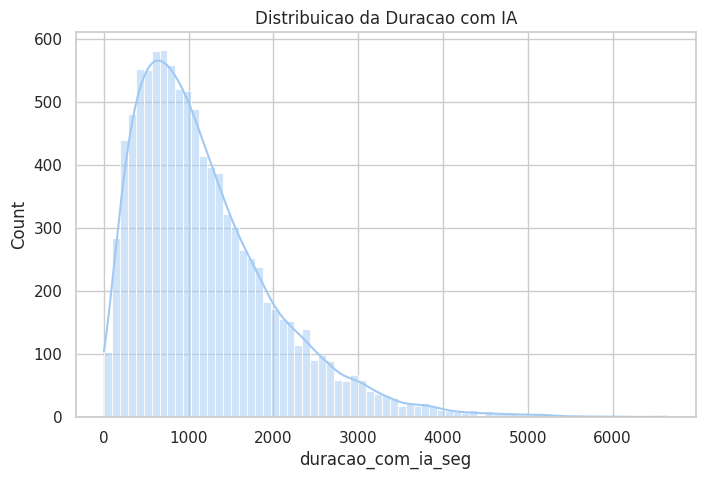

In [ ]:
# Distribuição Duração com IA
plt.figure(figsize = (8,5))
sns.histplot(data = df, x = 'duracao_com_ia_seg', kde = True)
plt.title('Distribuicao da Duracao com IA')
plt.show()

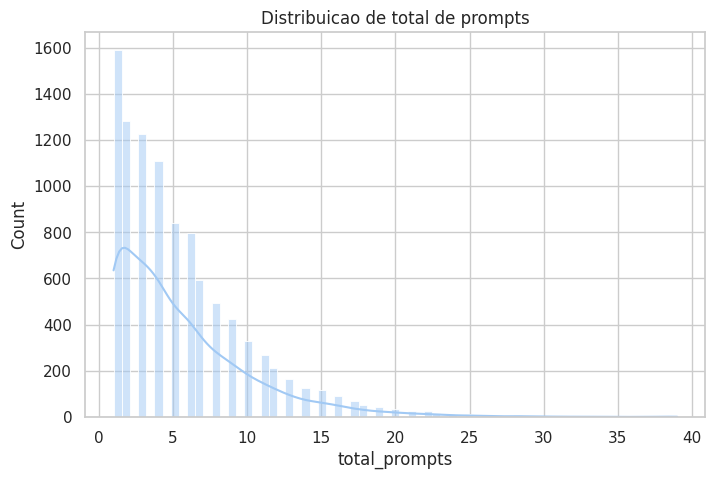

In [ ]:
# Distribuição Total de Prompts
plt.figure(figsize = (8,5))
sns.histplot(data = df, x = 'total_prompts', kde = True)
plt.title('Distribuicao de total de prompts')
plt.show()

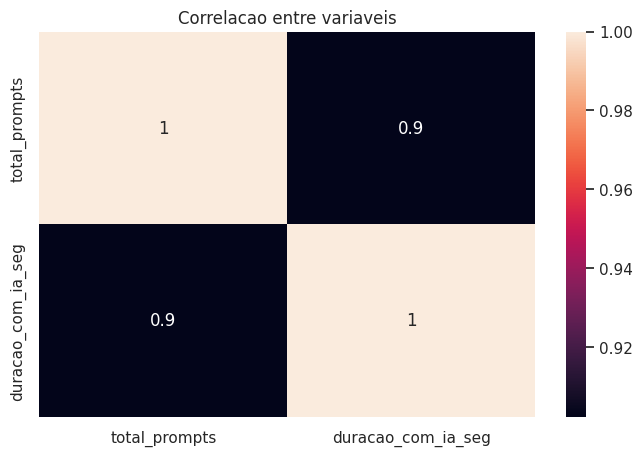

In [ ]:
# Correlação entre total_prompts e duracao_com_ia_seg
df_cor = df[['total_prompts','duracao_com_ia_seg']].corr()
plt.figure(figsize = (8,5))
sns.heatmap(df_cor, annot = True)
plt.title('Correlacao entre variaveis')
plt.show()

## Pre processamento

### Divisão dos dados

In [ ]:
# Visualizando o df
df.sample(5)

,id_sessao,nivel_estudantil,disciplina,data,duracao_com_ia_min,duracao_com_ia_seg,total_prompts,tipo_tarefa,nivel_assistencia_ia,objetivo,usou_novamente,taxa_satisfacao,atendeu_a_expectativa
1523,SESSION01524,Graduando,Psicologia,2025-02-05,12.78,766.8,3,Escrita,4,Confuso,False,4.5,0
3265,SESSION03266,Graduado,Matematica,2024-08-24,1.87,112.2,1,Escrita,4,Ideia Elaborada,True,4.1,1
7341,SESSION07342,Graduando,Biologia,2024-09-21,11.05,663.0,4,Tarefa de Casa,3,Confuso,True,2.3,0
8161,SESSION08162,Graduando,Engenharia,2025-02-04,30.14,1808.4,6,Escrita,2,Desistiu,True,1.7,0
5535,SESSION05536,Graduado,Ciencias Computacao,2024-06-25,14.22,853.2,5,Estudo,2,Ideia Elaborada,True,3.1,1


In [103]:
# Dropar algumas variaveis
df_final = df.drop(columns=['id_sessao','disciplina','data','duracao_com_ia_min','tipo_tarefa','objetivo'], axis = 1)

In [104]:
# Verificando as colunas
df_final.sample(5)

,nivel_estudantil,duracao_com_ia_seg,total_prompts,nivel_assistencia_ia,usou_novamente,taxa_satisfacao,atendeu_a_expectativa
90,Graduando,1489.8,8,3,True,3.4,1
5269,Graduando,1584.6,5,5,False,4.2,1
4067,Graduando,1131.0,5,3,True,2.0,1
9928,Graduando,1639.8,5,5,False,4.5,1
2170,Ensino Medio,934.2,7,4,True,4.7,1


In [105]:
# Valores por nivel estudantil
df_final.nivel_estudantil.value_counts()

,count
nivel_estudantil,
Graduando,5978
Ensino Medio,2027
Graduado,1995


In [106]:
# Enconding do nivel_estudantil
df_final['nivel_estudantil'] = df_final['nivel_estudantil'].map({'Ensino Medio':0,'Graduando':1,'Graduado':2})

In [107]:
# Divisão das variáveis preditoras e variável alvo
X = df_final.drop(columns='usou_novamente', axis = 1)
y = df_final['usou_novamente']

In [108]:
# Split dos dados em treino e teste
X_treino,X_teste,y_treino,y_teste = train_test_split(X,y, test_size = 0.2, random_state=42)

In [109]:
# Dimensão dos dados de treino e teste
print(X_treino.shape)
print(X_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(8000, 6)
(2000, 6)
(8000,)
(2000,)


### Criando um preprocessador e um Pipeline

In [110]:
# Atributos do df_final
atributos = df_final.columns.to_list()
atributos = [x for x in atributos if 'usou_novamente' not in x]
print(atributos)

['nivel_estudantil', 'duracao_com_ia_seg', 'total_prompts', 'nivel_assistencia_ia', 'taxa_satisfacao', 'atendeu_a_expectativa']


In [111]:
# Criação de um preprocessor para o Pipeline
preprocessor = ColumnTransformer(transformers= [
    ('num', StandardScaler(),atributos)
    ])

## Modelagem Preditiva

In [112]:
# Testar os modelos no formato vanilla
resultados = []
# Modelos
modelos = {
    'LogReg': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Neighboors': KNeighborsClassifier()
}

# Rodando de uma vez
for nome, modelo in modelos.items():
  pipe = Pipeline(steps=[('preprocessor',preprocessor),('model', modelo)])
  pipe.fit(X_treino, y_treino)
  for dataset, (X,y) in {"Treino": (X_treino, y_treino), 'Teste': (X_teste, y_teste)}.items():
    # Previsao
    y_pred = modelo.predict(X)
    # Metricas
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    auc = roc_auc_score(y, y_pred)
    # Resultados
    resultados.append({"Algoritmo": nome,"Dados": dataset,"Accuracy": acc,"Precisao": prec,"Recall": rec,"AUC": auc})

In [113]:
# Dataframe de resultados
df_resultados = pd.DataFrame(resultados)

In [114]:
# Visualizando o dataframe
df_resultados.sort_values(by = ['Dados', 'Accuracy'], ascending = False)

,Algoritmo,Dados,Accuracy,Precisao,Recall,AUC
4,XGBoost,Treino,0.724750,0.738249,0.948582,0.562831
2,RandomForest,Treino,0.709875,0.709875,1.000000,0.500000
6,Naive Bayes,Treino,0.709875,0.709875,1.000000,0.500000
10,K-Neighboors,Treino,0.709875,0.709875,1.000000,0.500000
8,Decision Tree,Treino,0.446250,0.704821,0.378412,0.495324
0,LogReg,Treino,0.302500,0.796407,0.023420,0.504385
5,XGBoost,Teste,0.712500,0.723510,0.946570,0.565968
3,RandomForest,Teste,0.692500,0.692500,1.000000,0.500000
7,Naive Bayes,Teste,0.692500,0.692500,1.000000,0.500000
11,K-Neighboors,Teste,0.692500,0.692500,1.000000,0.500000


## Otimização de Hiperparãmetros e Validação Cruzada

O modelo que melhor obteve o Roc-Auc no formato vanilla foi o XGBoost. Portanto, iremos usá-lo para tentar obter um aumento nessa métrica a partir da otimização de seus hiperparâmetros.

In [128]:
# Criação do Pipeline usando o XGBoost como modelo
df_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier())
])

In [129]:
# Grid de hiperparâmetros
param_grid = {
    'model__n_estimators': [100, 300, 500],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__scale_pos_weight': [1, 5, 10]
    }

# Aplicação da validação cruzada
grid = GridSearchCV(df_pipeline, param_grid=param_grid, cv = 3, scoring='roc_auc', verbose=1, n_jobs=-1)
grid.fit(X_treino, y_treino)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['nivel_estudantil',
                                                                          'duracao_com_ia_seg',
                                                                          'total_prompts',
                                                                          'nivel_assistencia_ia',
                                                                          'taxa_satisfacao',
                                                                          'atendeu_a_expectativa'])])),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__max_depth': [3, 5, 7],
                         'model__n_estimators': [100, 300, 500],
                         'model__scale_pos_weight': [1, 5, 10]},
             scoring='roc_auc', verbose=1)

In [120]:
# Metricas da validação cruzada
print("Melhores parâmetros:", grid.best_params_)
print("Melhor score CV:", grid.best_score_)

Melhores parâmetros: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 300, 'model__scale_pos_weight': 1}
Melhor score CV: 0.6683598640912601


In [121]:
# Selecionando o melhor modelo
melhor_modelo = grid.best_estimator_

In [125]:
# Previsão
y_pred = melhor_modelo.predict(X_teste)

In [127]:
# ROC AUC
print('ROC-AUC',roc_auc_score(y_teste, y_pred))

ROC-AUC 0.6747732675882716


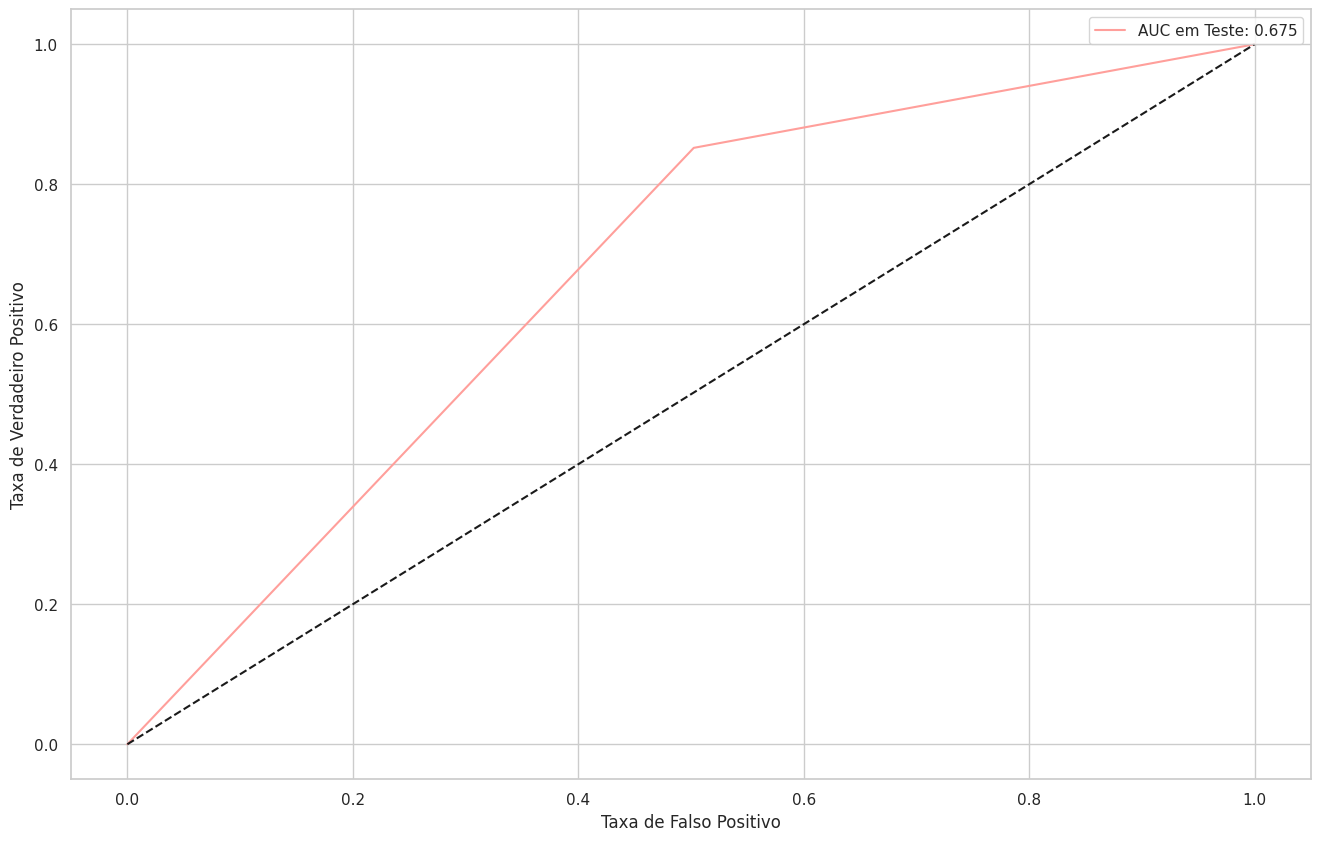

In [131]:
# Calcula a curva ROC nos dados de teste
fpr_test, tpr_test, thresholds_test = roc_curve(y_teste, y_pred)
auc_test = roc_auc_score(y_teste, y_pred)

# Grafico
plt.figure(figsize=(16,10))
plt.plot(fpr_test, tpr_test, 'r-', label = 'AUC em Teste: %.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.legend()
plt.show()